# Aufgabe 3

In [2]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

df_P0_1k = pd.read_hdf("zwei_populationen.h5", key="P_0_1000")
df_P0_10k = pd.read_hdf("zwei_populationen.h5", key="P_0_10000")
df_P1 = pd.read_hdf("zwei_populationen.h5", key="P_1")

## Teilaufgabe a)

In [3]:
P0_1k = df_P0_1k.values
P0_10k = df_P0_10k.values
P1 = df_P1.values

muP0 = np.array([np.mean(P0_10k, axis=0)])
muP0 = np.transpose(muP0) # Now it is a proper column vector
print('muP0 =', muP0)
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)
print('muP1 =', muP1)

muP0 = [[-0.02743075]
 [ 2.97994465]]
muP1 = [[ 5.98644821]
 [ 3.0852829 ]]


## Teilaufgabe b)

In [4]:
covP0 = np.size(P0_10k)*np.cov(P0_10k, ddof = 0, rowvar=False)
print('Streumatrix der ersten Pop =', covP0)
covP1 = np.size(P1)*np.cov(P1, ddof = 0, rowvar=False)
print('Streumatrix der zweiten Pop =', covP1)
# is this the combined covariance matrix
Sw = covP0 + covP1
print('Streumatrix der Intravarianz, Sw = S0 + S1 =', Sw)
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
print('Streumatrix der Intervarianz, Sb =', Sb)

Streumatrix der ersten Pop = [[ 244154.15449573  163151.87999466]
 [ 163151.87999466  134443.81962687]]
Streumatrix der zweiten Pop = [[ 247019.0030075   148200.30134058]
 [ 148200.30134058  109535.34588752]]
Streumatrix der Intravarianz, Sw = S0 + S1 = [[ 491173.15750322  311352.18133524]
 [ 311352.18133524  243979.16551439]]
Streumatrix der Intervarianz, Sb = [[  3.61667401e+01   6.33491486e-01]
 [  6.33491486e-01   1.10961469e-02]]


## Teilaufgabe c)

In [5]:
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True) # d are the eigenvalues and in V the eigenvectors are stored
w = V[:,0] # get first column, it belongs to the greatest eigenvalue
print('Der berechnete Eigenvektor ist =', w)

Der berechnete Eigenvektor ist = [ 0.61886608 -0.78549652]


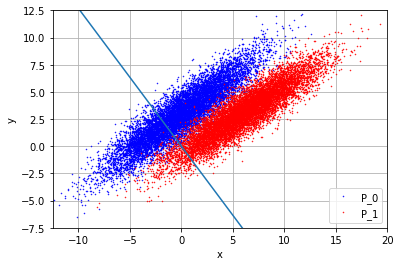

Die Geradengleichung wäre dann f(x)= -1.26925121068 * x, wenn die Gerade durch den Nullpunkt geht.


In [6]:
x0, y0 = zip(*P0_10k)
x1, y1 = zip(*P1)
linspace = np.linspace(-20,20,100)
plt.plot(x0, y0, 'b.', label='P_0', markersize=1)
plt.plot(x1, y1, 'r.', label='P_1', markersize=1)
plt.plot(linspace, w[1]/w[0]*linspace)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-12.5,20,-7.5,12.5])
plt.show()
print('Die Geradengleichung wäre dann f(x)=', w[1]/w[0], '* x, wenn die Gerade durch den Nullpunkt geht.')

## Teilaufgabe d)

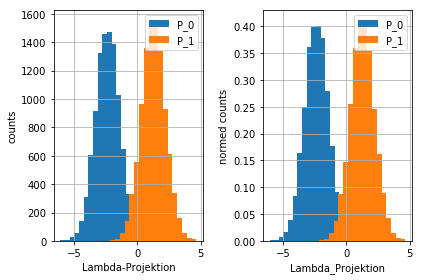

In [7]:
plt.clf()
projectionsP0 = np.dot(P0_10k, w)
projectionsP1 = np.dot(P1, w)
plt.subplot(1,2,1)
plt.hist(projectionsP0, label='P_0', bins=20)
plt.hist(projectionsP1, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda-Projektion')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(projectionsP0, normed=True, label='P_0', bins=20)
plt.hist(projectionsP1, normed=True, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda_Projektion')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()

## Teilaufgabe e)

Signalgröße = 10000
Untergrundgröße = 10000
True negatives [10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000
  9999  9999  9999  9999  9999  9996  9993  9991  9985  9971  9945  9905
  9853  9760  9629  9425  9198  8910  8507  8015  7442  6790  6102  5376
  4640  3874  3185  2565  2003  1543  1158   852   592   411   269   179
   106    63    41    28    19    12     5     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
False negatives [    0     0     0     0     0     0     0     0     0     0     0     0
     1     1     1     1     1     4     7     9    15    29    55    95
   147   240   371   575   802  1090  1493  1985  2558  3210  3898  4624
  5360  6126  6815  7435  7997  8457  8842  9148  9408  9589  9731  9821
  9894  9937  9959  997

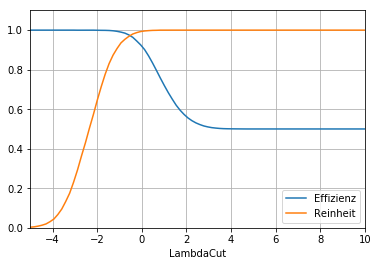

In [8]:
plt.clf()
signal = projectionsP0
print('Signalgröße =', np.size(signal))
untergrund = projectionsP1
print('Untergrundgröße =', np.size(untergrund))
truePos = 0 # We store the true positives per cut in this array
falsePos = 0
trueNeg = 0
falseNeg = 0
truePosArray = [] # We append each truePos to this array to find
signalDetected = 0
# the dependence of the true positives on the cut 
falsePosArray = [] # We choose a list because np arrays have a fixed size as far as we know
trueNegArray = []
falseNegArray = []
signalDetectedArray = [] # ICH WEIS NICHT OB MAN SO DIESES S/B UND DIE SIGNIFIKANZ BERECHNET: NACHFRAGEN!!!!!!!!!!!!!!!!!
for lambdaCut in np.linspace(-5,12.5,100):
    truePos = 0
    falsePos = 0
    trueNeg = 0
    falseNeg = 0
    signalDetected = 0
    for i in range(0, np.size(signal)): # Count through the signal
        if signal[i] <= lambdaCut:
            truePos += 1
            signalDetected += 1
        else:
            falseNeg += 1
    for i in range(0, np.size(untergrund)):
        if untergrund[i] <= lambdaCut:
            falsePos += 1
            signalDetected += 1
        else:
            trueNeg += 1
    truePosArray.append(truePos)
    falsePosArray.append(falsePos)
    trueNegArray.append(trueNeg)
    falseNegArray.append(falseNeg)
    signalDetectedArray.append(signalDetected)

truePosArray = np.asarray(truePosArray)
falsePosArray = np.asarray(falsePosArray)
trueNegArray = np.asarray(trueNegArray)
falseNegArray = np.asarray(falseNegArray)
signalDetectedArray = np.asarray(signalDetectedArray)
print('True negatives', trueNegArray)
print('False negatives', falsePosArray)

efficiency = (truePosArray)/(truePosArray+falsePosArray) # Effizienz
purity = (truePosArray)/(truePosArray+falseNegArray) # Reinheit

lambdaCut = np.linspace(-5,12.5,100)
plt.plot(lambdaCut, efficiency, label='Effizienz')
plt.plot(lambdaCut, purity, label='Reinheit')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()

[   2    3    7   10   14   29   45   73  108  140  185  233  298  359  431
  507  571  648  710  772  819  866  902  931  949  972  984  988  993  995
  998 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1    1    1    1    1    2    4    5   13   18   29   52   71  116
  160  207  258  334  405  497  584  653  722  767  815  861  896  930  947
  963  976  983  990  995  998  998  998 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 

C:\Users\jlspa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


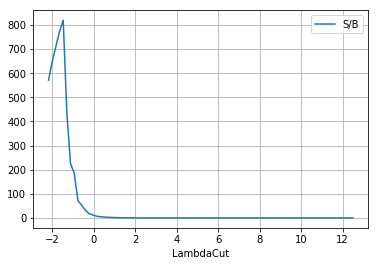

In [20]:
print(truePosArray)
print(falsePosArray)
SDurchB = truePosArray/falsePosArray
plt.plot(lambdaCut, SDurchB, label='S/B')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
#plt.axis([-5,10,0,1.1])
plt.show()

## Teilaufgabe h)
Wiederholung aller vorherigen Teilaufgaben, wenn wir als Population $P_0$ den 1000 Elemente großen Datensatz P0_1k bzw. P_0_1000 betrachten.

In [10]:
plt.clf()
muP0 = np.array([np.mean(P0_1k, axis=0)])
muP0 = np.transpose(muP0)
print('muP0 =', muP0)
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)
print('muP1 =', muP1)

muP0 = [[-0.09576791]
 [ 2.8788468 ]]
muP1 = [[ 5.98644821]
 [ 3.0852829 ]]


In [11]:
covP0 = np.size(P0_1k)*np.cov(P0_1k, ddof = 0, rowvar=False)
print('Streumatrix der ersten Pop =', covP0)
covP1 = np.size(P1)*np.cov(P1, ddof = 0, rowvar=False)
print('Streumatrix der zweiten Pop =', covP1)
# is this the combined covariance matrix
Sw = covP0 + covP1
print('Streumatrix der Intravarianz, Sw = S0 + S1 =', Sw)
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
print('Streumatrix der Intervarianz, Sb =', Sb)

Streumatrix der ersten Pop = [[ 24447.7728588   16304.6766634 ]
 [ 16304.6766634   13502.86377453]]
Streumatrix der zweiten Pop = [[ 247019.0030075   148200.30134058]
 [ 148200.30134058  109535.34588752]]
Streumatrix der Intravarianz, Sw = S0 + S1 = [[ 271466.77586629  164504.97800398]
 [ 164504.97800398  123038.20966205]]
Streumatrix der Intervarianz, Sb = [[ 36.99335291   1.25558896]
 [  1.25558896   0.04261586]]


In [12]:
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True)
w = V[:,0]
print('Der berechnete Eigenvektor ist =', w)

Der berechnete Eigenvektor ist = [ 0.60323736 -0.79756172]


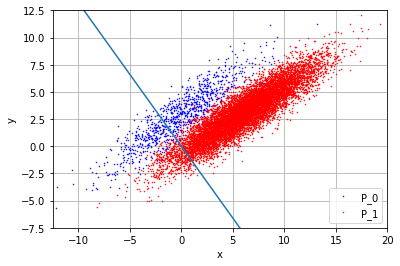

Die Geradengleichung wäre dann f(x)= -1.32213582442 * x, wenn die Gerade durch den Nullpunkt geht.


In [13]:
x0, y0 = zip(*P0_1k)
x1, y1 = zip(*P1)
linspace = np.linspace(-20,20,100)
plt.plot(x0, y0, 'b.', label='P_0', markersize=1)
plt.plot(x1, y1, 'r.', label='P_1', markersize=1)
plt.plot(linspace, w[1]/w[0]*linspace)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-12.5,20,-7.5,12.5])
plt.show()
print('Die Geradengleichung wäre dann f(x)=', w[1]/w[0], '* x, wenn die Gerade durch den Nullpunkt geht.')

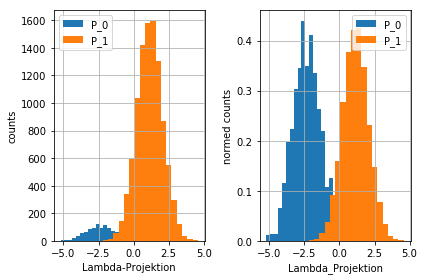

In [14]:
plt.clf()
projectionsP0 = np.dot(P0_1k, w)
projectionsP1 = np.dot(P1, w)
plt.subplot(1,2,1)
plt.hist(projectionsP0, label='P_0', bins=20)
plt.hist(projectionsP1, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda-Projektion')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(projectionsP0, normed=True, label='P_0', bins=20)
plt.hist(projectionsP1, normed=True, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda_Projektion')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()

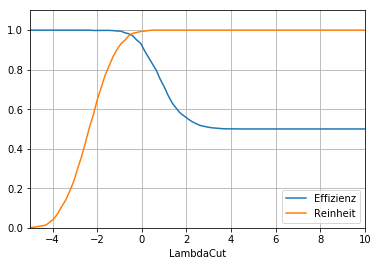

In [15]:
plt.clf()
signal = projectionsP0
untergrund = projectionsP1
truePos = 0 # We store the true positives per cut in this array
falsePos = 0
falseNeg = 0
truePosArray = [] # We append each truePos to this array to find
signalDetected = 0
# the dependence of the true positives on the cut 
falsePosArray = [] # We choose a list because np arrays have a fixed size as far as we know
falseNegArray = []
signalDetectedArray = [] # ICH WEIS NICHT OB MAN SO DIESES S/B UND DIE SIGNIFIKANZ BERECHNET: NACHFRAGEN!!!!!!!!!!!!!!!!!
for lambdaCut in np.linspace(-5,12.5,100):
    truePos = 0
    falsePos = 0
    falseNeg = 0
    signalDetected = 0
    for i in range(0,1000): # Count through the signal and background
        if signal[i] <= lambdaCut:
            truePos += 1
            signalDetected += 1
        else:
            falseNeg += 1
    for i in range(0,1000):
        if untergrund[i] <= lambdaCut:
            falsePos += 1
            signalDetected += 1
    truePosArray.append(truePos)
    falsePosArray.append(falsePos)
    falseNegArray.append(falseNeg)
    signalDetectedArray.append(signalDetected)

truePosArray = np.asarray(truePosArray)
falsePosArray = np.asarray(falsePosArray)
falseNegArray = np.asarray(falseNegArray)
signalDetectedArray = np.asarray(signalDetectedArray)

efficiency = (truePosArray)/(truePosArray+falsePosArray) # Effizienz
purity = (truePosArray)/(truePosArray+falseNegArray) # Reinheit

lambdaCut = np.linspace(-5,12.5,100)
plt.plot(lambdaCut, efficiency, label='Effizienz')
plt.plot(lambdaCut, purity, label='Reinheit')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()